Rechneranwendungen in der Physik - Übung N.2 Taylorentwicklung der Kosinusfunktion

Santiago.R  Diego Rubio Carrera

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import time

Zur Approximation der Kosinusfunktion entwickeln wir die Taylorreihe für $f(x)=cos(x)$ um den Entwicklungspunkt $x_0=0$. Die Taylorreihe, die beliebige Funktionen mithilfe von Polynomen n-ter Ordnungen annähert, ist allgemein definiert als $T(x,x_0,n)=\sum_{k=0}^n \frac{f^{(k)}(x_0)}{k!}(x-x_0)^k$, d.h. also als Summe der Produkte von den k-ten Ableitungen am Entwicklungspunkt und den k-Potenzen der Variable $x$. Um diese Taylorreihe zu entwickeln müssen also die Ableitungen (oder die Werte der Differentialquotienten am Entwicklungspunkt) bis zur k-ten Ordnung aus der angenäherten Funktion entnommen werden. Diese ist die Kosinusfunktion und diese definieren wir also zunächst im Notebook mithilfe vom Modul Numpy als $y_1(x)=cos(x)$, weshalb folgt;

In [2]:
def y1(x):
    return np.cos(x)

Für die Ableitungen der Kosinusfunktion gilt aus der Lehre in der mathematischen Analyse $f'(x)=-sin(x)$, $f''(x)=-cos(x)$, $f'''(x)=sin(x)$ u.s.w. sodass gilt 
$
f^{(k)}(x)=
\begin{cases}
(-1)^{i} sin(x) \ \ \ \ \ \ \ \ \ \ \forall k=2i-1 \ \ :i \in  \mathbb{N} \\
(-1)^j cos(x) \ \ \ \ \ \ \ \ \ \ \forall k=2j \ \ :j \in  \mathbb{N} \\
\end{cases}
$, wobei aber alle Terme im ersten Fall mit $sin(x)$ für den Entwicklungspunkt $x_0=0$ entfallen aufgrund von $sin(0)=0$. Somit bleiben für die Taylorentwicklung der Kosinusfunktion um den Punkt $x_0=0$ nur die Terme von $f^{(k)}(x_0)=(-1)^k cos(x_0)= (-1)^k$ in der Summe s.d. für die Taylorreihe um $x_0=0$ folgt; $\ \ T_{(0)}(x,n)=\sum_{k=0}^n \frac{(-1)^{k}}{(2k)!}x^{2k}$

In [3]:
def T(x, n):
    taylor = 0
    for k in range(n+1):
        taylor += ((-1)**k) * (x ** (2*k)) / (math.factorial(2 * k))
    return taylor

Diese Taylorreihe soll nun für $n=0,2,4...10$ entwickelt und die Laufzeiten $\Delta t$ der nummerischen Berechnungen für jede einzelne Taylorentwicklung angegeben werden. Anschließend werden die ausgewerteten Polynome mitsamt der eigentlichen Kosinusfunktion gemeinsam in einem Plot dargestellt.  

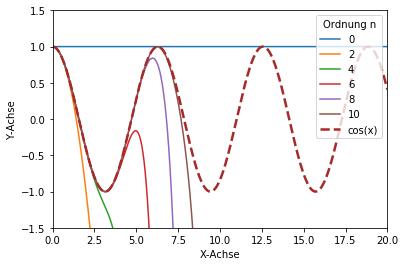

Die Laufzeit der Taylor-Entwicklung bis zur Ordnung n = 0 ist t = 0.045 Sekunden
Die Laufzeit der Taylor-Entwicklung bis zur Ordnung n = 2 ist t = 0.002 Sekunden
Die Laufzeit der Taylor-Entwicklung bis zur Ordnung n = 4 ist t = 0.002 Sekunden
Die Laufzeit der Taylor-Entwicklung bis zur Ordnung n = 6 ist t = 0.006 Sekunden
Die Laufzeit der Taylor-Entwicklung bis zur Ordnung n = 8 ist t = 0.004 Sekunden
Die Laufzeit der Taylor-Entwicklung bis zur Ordnung n = 10 ist t = 0.005 Sekunden


In [4]:
x = np.linspace(0,20,num=20000)
n0=0
t0 = time.time()
plt.plot(x, T(x, n0),label=0)
Laufzeit0 = time.time()-t0
mylist=[]
for n in range(1,11,2):
    t = time.time()
    plt.plot(x, T(x, n),label=n+1)
    Laufzeit = time.time()-t
    mylist.append(Laufzeit)
plt.plot(x, y1(x), color="brown", linewidth=2.5, linestyle="--",label='cos(x)')
plt.legend(title="Ordnung n",loc='upper right')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
startx, endx = 0, 20
starty, endy = -1.5, 1.5
plt.axis([startx, endx, starty, endy])
plt.show()
s = set(mylist)
print('Die Laufzeit der Taylor-Entwicklung bis zur Ordnung n =', 0,'ist t =',round(Laufzeit0,3),'Sekunden')
for i in range(0,5,1):
    print('Die Laufzeit der Taylor-Entwicklung bis zur Ordnung n =', 2+2*i,'ist t =',round(list(s)[i],3),'Sekunden')